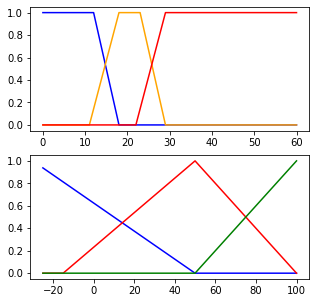

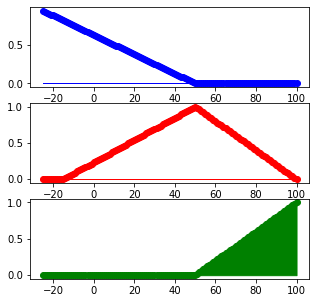

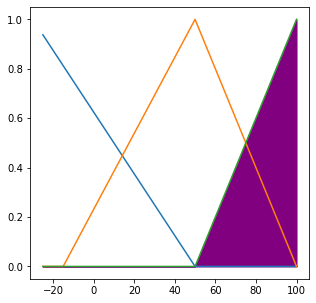

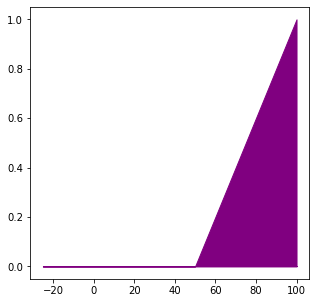

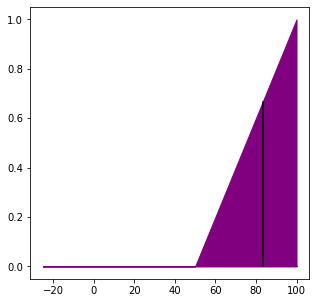

83.33333333333336


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzzy

tempInicial = 30

temperaturas = np.arange(0,121, 1)
velocidades = np.arange(-25,101, 1)

cold = fuzzy.trapmf(temperaturas, np.array([0,0,12,18]))
warm = fuzzy.trapmf(temperaturas, np.array([11,18,23,29]))
hot = fuzzy.trapmf(temperaturas, np.array([22,29,60,60]))

incrementarVel = fuzzy.trimf(velocidades, np.array([50,100,100]))
mantenerVel= fuzzy.trimf(velocidades, np.array([-15,50,100]))
disminuirVel = fuzzy.trimf(velocidades, np.array([-30,-30,50]))

fig, (temps, vels) = plt.subplots(nrows=2, ncols=1, figsize=(5, 5))
temps.plot(temperaturas, cold, color="blue")
temps.plot(temperaturas, warm, color="orange")
temps.plot(temperaturas, hot, color="red")

vels.plot(velocidades,disminuirVel, color="blue" )
vels.plot(velocidades,mantenerVel, color="red" )
vels.plot(velocidades,incrementarVel, color="green" )

plt.show()

gradoCold = fuzzy.interp_membership(temperaturas, cold, tempInicial)
gradoWarm = fuzzy.interp_membership(temperaturas, warm, tempInicial)
gradoHot = fuzzy.interp_membership(temperaturas, hot, tempInicial)

gradoVelreducir = np.fmin(gradoCold, disminuirVel)
gradoVelmantener = np.fmin(gradoWarm, mantenerVel)
gradoVelincrementar = np.fmin(gradoHot, incrementarVel)

fig, (grafico1, grafico2, grafico3) = plt.subplots(nrows=3, ncols=1, figsize=(5, 5))

grafico1.plot(velocidades, disminuirVel, "-o", color="blue")
grafico1.fill_between(velocidades, gradoVelreducir, color="blue")

# grafico2.fill_between(velocidades, mascara, gradoVelmantener, color="green", label="Gráfica azul")
grafico2.plot(velocidades, mantenerVel, "-o", color = "red")
grafico2.fill_between(velocidades, gradoVelmantener, color="red")

# grafico3.fill_between(velocidades, mascara, gradoVelincrementar1, color="red", label="Gráfica azul")
grafico3.plot(velocidades, incrementarVel, "-o", color = "green")
grafico3.fill_between(velocidades, gradoVelincrementar, color="green")

plt.show()

resultadoFinal = np.fmax(gradoVelincrementar, np.fmax(gradoVelmantener,gradoVelreducir))

fig, (graficoFinal) = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

graficoFinal.plot(velocidades, disminuirVel)
graficoFinal.plot(velocidades, mantenerVel)
graficoFinal.plot(velocidades, incrementarVel)

graficoFinal.fill_between(velocidades, gradoVelreducir, color="purple")
graficoFinal.fill_between(velocidades, gradoVelmantener, color="purple")
graficoFinal.fill_between(velocidades, gradoVelincrementar, color="purple")

# graficoFinal.plot(velocidades, mantenerVel)
# graficoFinal.fill_between(velocidades, mascara, gradoVelincrementar, color="blue", label="Gráfica azul")

plt.show()

fig, (graficoFinal) = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

# graficoFinal.plot(velocidades, disminuirVel)
# graficoFinal.plot(velocidades, mantenerVel)
# graficoFinal.plot(velocidades, incrementarVel)

graficoFinal.fill_between(velocidades, gradoVelreducir, color="purple")
graficoFinal.fill_between(velocidades, gradoVelmantener, color="purple")
graficoFinal.fill_between(velocidades, gradoVelincrementar, color="purple")

# graficoFinal.plot(velocidades, mantenerVel)
# graficoFinal.fill_between(velocidades, mascara, gradoVelincrementar, color="blue", label="Gráfica azul")



plt.show()

vel = fuzzy.defuzz(velocidades, resultadoFinal, 'centroid')

fig, (graficoFinal) = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

# graficoFinal.plot(velocidades, disminuirVel)
# graficoFinal.plot(velocidades, mantenerVel)
# graficoFinal.plot(velocidades, incrementarVel)

graficoFinal.fill_between(velocidades, gradoVelreducir, color="purple")
graficoFinal.fill_between(velocidades, gradoVelmantener, color="purple")
graficoFinal.fill_between(velocidades, gradoVelincrementar, color="purple")


velEvaluada = fuzzy.interp_membership(velocidades, resultadoFinal, vel)

arregloSalidaX = [vel, vel]
arregloSalidaY = [0, velEvaluada]

graficoFinal.plot(arregloSalidaX, arregloSalidaY, color="black")
# graficoFinal.plot(velocidades, mantenerVel)
# graficoFinal.fill_between(velocidades, mascara, gradoVelincrementar, color="blue", label="Gráfica azul")

plt.show()

print(vel)

